In [1]:
import numpy as np
import pandas as pd

In [2]:
delta = 0.2
dx = 0.02
dt = 4
c_cong = -13
t = abs(delta/c_cong/2)
x_mat = int(delta/dx + 1)
t_mat = int(t/dt*3600)*2+1
print(t_mat,x_mat)
matrix = np.zeros([x_mat,t_mat])

13 11


In [3]:

matrix_df = pd.DataFrame(matrix)
st_df = matrix_df.stack().reset_index()
st_df.columns = ['x', 't', 'weight']

In [4]:
st_df['time'] = dt * (st_df['t'] - int(t_mat/2))
st_df['space'] = dx * (st_df['x'] - int(x_mat/2))

In [5]:
# Define the variables speed and tau
c_cong = -13
tau = 10

# Function to fill weight based on the updated condition using speed and tau
def fill_weight(row):
    t_new = row['time'] - row['space'] / (c_cong/3600)
    if abs(t_new) < tau/2:
        return np.exp(-(abs(t_new)/tau+abs(row['space'])/delta))
    else:
        return 0
# Applying the function to the DataFrame
st_df['weight'] = st_df.apply(fill_weight, axis=1)

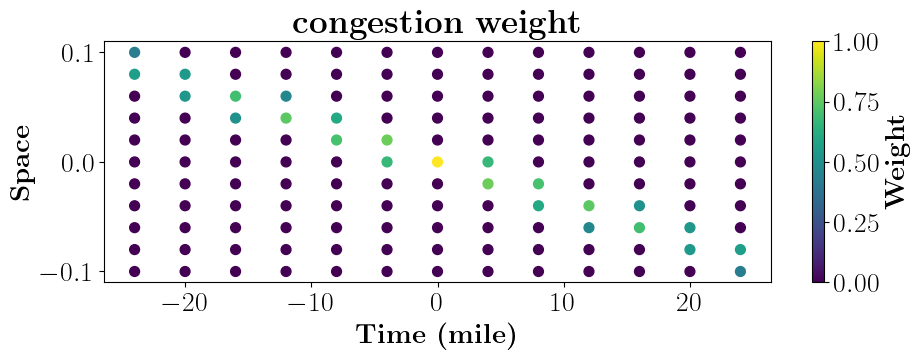

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
# Set LaTeX font
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=20)
plt.scatter(st_df.time,st_df.space,c=st_df.weight,vmax= 1,vmin=0,s=50)
plt.xlabel(r'\textbf{Time (mile)}')  # Example of LaTeX formatted label
plt.ylabel(r'\textbf{Space}')  # Example of LaTeX formatted label
plt.title(r'\textbf{congestion weight}')  # Example of LaTeX formatted title
plt.colorbar(label=r'\textbf{Weight}')  # Example of LaTeX formatted colorbar label
plt.tight_layout()
plt.savefig('congest.png',dpi=300,bbox_inches='tight')
plt.show()

In [7]:
delta = 0.2
dx = 0.02
dt = 4
c_cong = 46
t = abs(delta/c_cong/2)
x_mat = int(delta/dx + 1)
t_mat = int(t/dt*3600)*2+1
print(t_mat,x_mat)
matrix = np.zeros([x_mat,t_mat])
tau = 10

# Function to fill weight based on the updated condition using speed and tau
def fill_weight(row):
    t_new = row['time'] - row['space'] / (c_cong/3600)
    if abs(t_new) < tau/2:
        return np.exp(-(abs(t_new)/tau+abs(row['space'])/delta))
    else:
        return 0
# Applying the function to the DataFrame
st_df['weight'] = st_df.apply(fill_weight, axis=1)

3 11


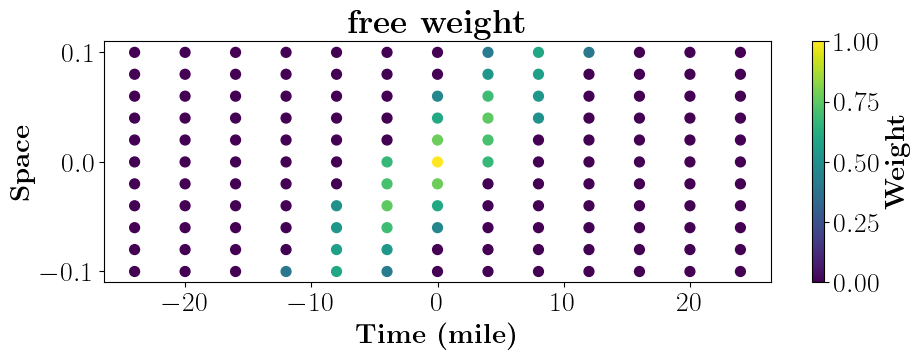

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
# Set LaTeX font
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=20)
plt.scatter(st_df.time,st_df.space,c=st_df.weight,vmax= 1,vmin=0,s=50)
plt.xlabel(r'\textbf{Time (mile)}')  # Example of LaTeX formatted label
plt.ylabel(r'\textbf{Space}')  # Example of LaTeX formatted label
plt.title(r'\textbf{free weight}')  # Example of LaTeX formatted title
plt.colorbar(label=r'\textbf{Weight}')  # Example of LaTeX formatted colorbar label
plt.tight_layout()
plt.savefig('free.png',dpi=300,bbox_inches='tight')
plt.show()